### Predicting Diabetes

In [81]:
%config IPCompleter.greedy=True

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load Pima Diabetes data

In [34]:
df=pd.read_csv("C:\\PythonML\\MachineLearningWithPython\\Notebooks\\data\\pima-data.csv")
df.shape
df.head(5)
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Pima non null values

In [30]:
df.isnull().values.any()
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [35]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


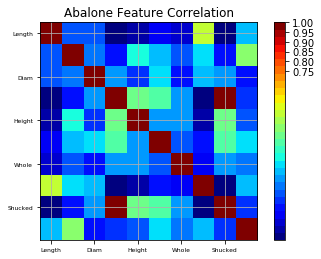

In [36]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

In [39]:
df_map={True:1,False:0}
df['diabetes']=df['diabetes'].map(df_map)


### Map Data


In [68]:
df.head(700)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


In [66]:
num_true= len(df.loc[df['diabetes']==True])             
num_false= len(df.loc[df['diabetes']==False])

print('Number of true cases: {0} and average:{1:2.2f}'.format(num_true, (num_true/(num_true+num_false))*100))
print('Number of false cases: {0} and average:{1:2.2f}'.format(num_false, (num_false/(num_true+num_false))*100))

Number of true cases: 268 and average:34.90
Number of false cases: 500 and average:65.10


### Splitting the data in 70% for training and 30% for testing

In [72]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
feature_columns=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_column=['diabetes']
X=df[feature_columns].values
Y=df[predicted_column].values
ratio=.30
##print(X)
x_train, x_test, y_train,y_test=train_test_split(X, Y,test_size=ratio,random_state=42)

In [101]:
print("{0:0.2f}".format((len(x_train)/(len(df.index))*100)))
print("{0:0.2f}".format((len(x_test)/(len(df.index))*100)))

69.92
30.08
